Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Cleaning

In [ ]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#no. of rows and colums
gold_data.shape

(2290, 6)

In [ ]:
#more information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#statistical measure
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#correlation measurements
correlation=gold_data.corr()

<ipython-input-11-8bafbb33f2ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

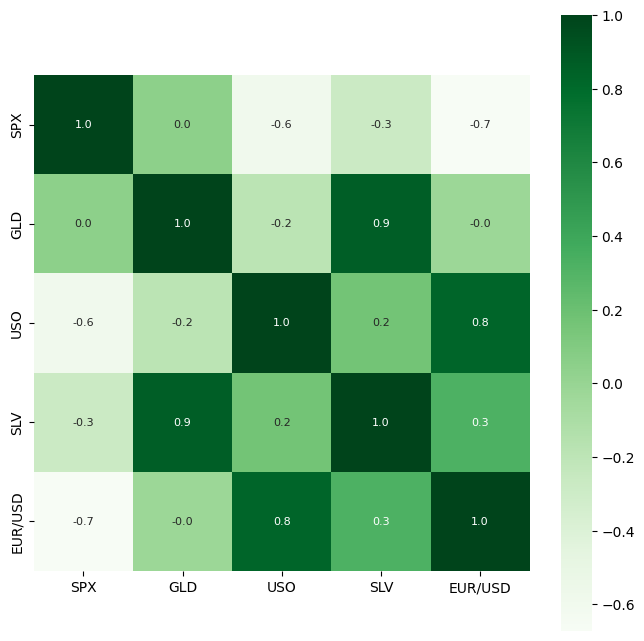

In [ ]:
#heatmap to view correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Greens' )

In [ ]:
#correlation values for gld
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


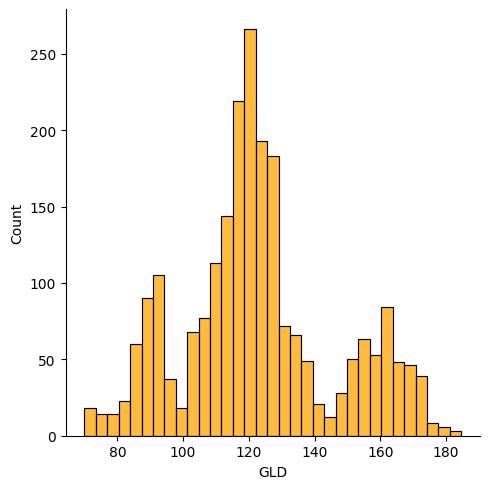

In [ ]:
#distribution of gold price
sns.displot(gold_data['GLD'],color='orange')

<ipython-input-15-c6417c6abb63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

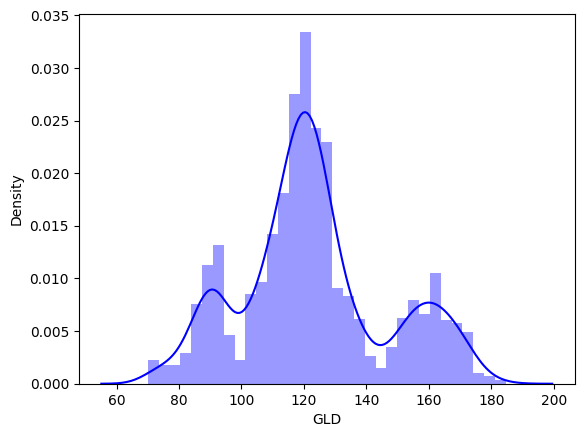

In [ ]:
sns.distplot(gold_data['GLD'],color='blue')

Splitting the target(GLD) from features

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting into Training and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training using Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100) #n_estimators is the number of decision trees.

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.21279912  81.9736     116.20410009 127.54580093 120.68190123
 154.82069744 150.32959866 126.19690019 117.4767988  125.87400116
 116.60170133 172.397001   141.39519918 168.02709899 115.2226001
 117.75120079 136.65930329 170.04100072 158.26670256 158.62209966
 155.10239982 125.54900055 175.62449994 157.14490388 125.1363005
  93.67369942  77.06709992 120.7201001  119.07789924 167.51609965
  88.11740046 125.25060041  90.96000059 117.82110026 121.14549923
 136.26940086 115.75030142 114.9427006  148.68240052 107.32250081
 104.2328024   87.14459767 126.53110059 117.79049961 152.66579912
 119.64100015 108.40839944 108.05749865  92.91210004 127.09789755
  74.76520038 113.66009907 121.24660055 111.25929904 118.72389905
 120.57339939 159.61120005 168.47640106 146.77889678  85.73129828
  94.19390033  86.92429915  90.38360014 118.87850069 126.49240053
 127.35869991 170.43290062 122.27589968 117.44139889  98.42720075
 167.31689963 142.98299875 132.46880263 121.24400201 121.42109929
 119.8118006

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print("R squared error is: ", error_score)

R squared error is:  0.989072540992367


Compare the actual and predicted values in a plot

In [ ]:
Y_test=list(Y_test)

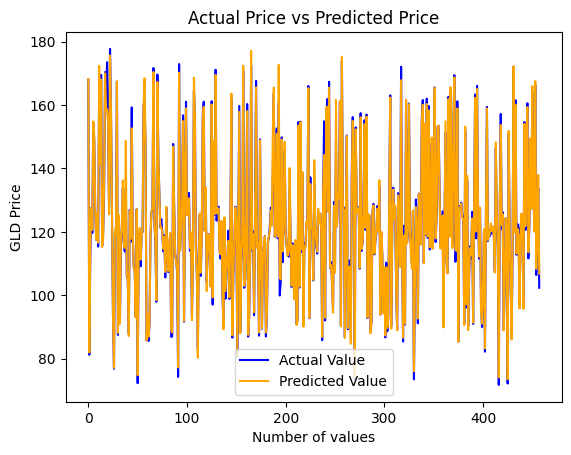

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()